## Predict :- Monthly Rant

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1d304de22f0c4824ad8b8f7107066adf = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1d304de22f0c4824ad8b8f7107066adf = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1d304de22f0c4824ad8b8f7107066adf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FAKMQ9LXMSCNZac96hTipw4XZSo9tza-uztpjgp1yDV6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1d304de22f0c4824ad8b8f7107066adf)

body = client_1d304de22f0c4824ad8b8f7107066adf.get_object(Bucket='citywisehouserantprediction-donotdelete-pr-shwe0j2brb2wu7',Key='99acres_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0


In [3]:
df.describe()

,monthly_rant,BHKS,sqft_per_inch,deposit
count,1.465280e+05,146528.000000,1.465280e+05,1.465280e+05
mean,3.414242e+04,2.159703,2.463806e+03,1.203667e+05
std,8.428243e+04,1.107673,1.816119e+05,2.937736e+05
min,5.000000e+02,1.000000,1.000000e+00,0.000000e+00
25%,1.300000e+04,1.000000,6.800000e+02,3.000000e+04
50%,2.000000e+04,2.000000,1.057000e+03,6.000000e+04
75%,3.290000e+04,3.000000,1.500000e+03,1.250000e+05
max,9.917000e+06,95.000000,4.356000e+07,2.100000e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146528 entries, 0 to 146527
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   city                      146528 non-null  object 
 1   monthly_rant              146528 non-null  float64
 2   BHKS                      146528 non-null  float64
 3   Baths                     146528 non-null  object 
 4   sqft_per_inch             146528 non-null  int64  
 5   build_up_area             146528 non-null  object 
 6   Type_of_property          146528 non-null  object 
 7   location_of_the_property  146528 non-null  object 
 8   deposit                   146528 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ MB


## Data Visulization

Numbers Of Area Type :

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<AxesSubplot:xlabel='build_up_area', ylabel='count'>

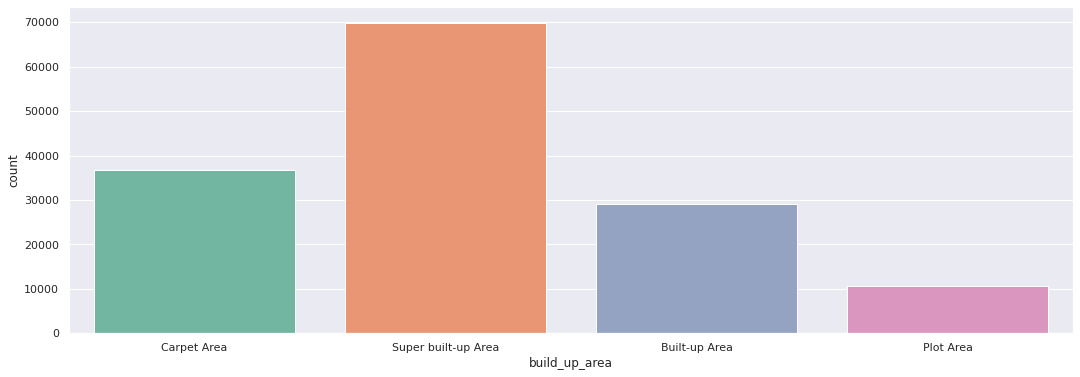

In [5]:
print("Numbers Of Area Type :")
print()
print(df['build_up_area'].value_counts())
sns.set(rc = {'figure.figsize':(18,6)})
sns.countplot(x='build_up_area', data=df, palette = 'Set2')

Types of Property :

Residential    102024
Independent     41243
Studio           2606
Serviced          363
Farm              161
for               118
Floor              13
Name: Type_of_property, dtype: int64


<AxesSubplot:xlabel='Type_of_property', ylabel='count'>

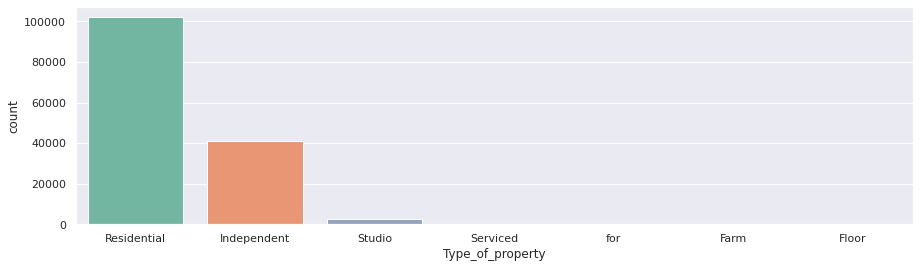

In [6]:
print("Types of Property :")
print()
print(df['Type_of_property'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='Type_of_property', data=df, palette = 'Set2')

Property Located Based On City :- 

ncr            42016
mumbai         37566
bangalore      25600
pune           18176
chennai         9973
hyderabad       7131
Ahmedabad       5602
Trivandraum      464
Name: city, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

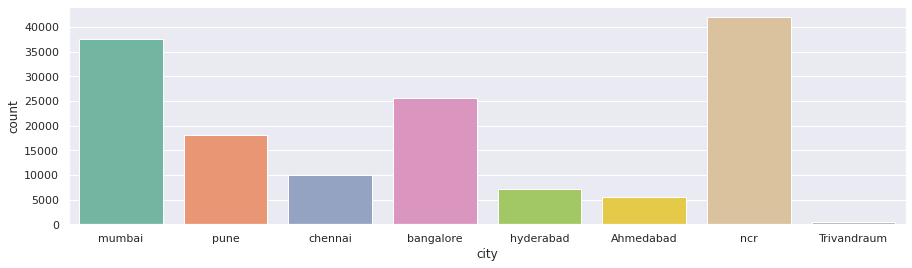

In [7]:
print("Property Located Based On City :- ")
print()
print(df['city'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='city', data=df, palette = 'Set2')

Property Located Based On City :- 

city       location_of_the_property
Ahmedabad  South Bopal                 542
           Satellite                   372
           Vaishnodevi Circle          240
           Thaltej                     232
           Gota                        227
                                      ... 
pune       wadheshwar nagar              1
           wakad                         1
           wakad ,pune                   1
           wakad bridge                  1
           yerwada                       1
Name: location_of_the_property, Length: 12859, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

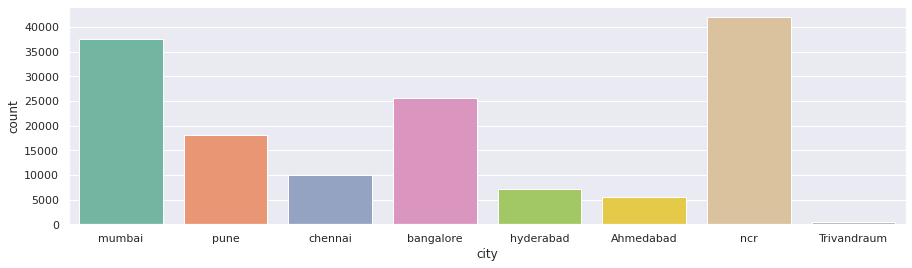

In [8]:
print("Property Located Based On City :- ")
print()
print(df.groupby('city')['location_of_the_property'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='city', data=df, palette = 'Set2')

## Column Baths

In [9]:
# Droping a features
df.drop('Baths',axis=1,inplace=True)

## Column Deposite

In [10]:
#Checking Null values
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [11]:
# How many unique categories is there
df.build_up_area.unique()

array(['Carpet Area', 'Super built-up Area', 'Built-up Area', 'Plot Area'],
      dtype=object)

In [12]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0


## Column Type Of Property

In [13]:
# Checking Unique Values
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [14]:
#df['Type_of_property'] = df['Type_of_property'].str.replace("for",' ')

In [15]:
df.shape

(146528, 8)

### Removing unwanted strings

In [16]:
# Removing for
df = df[df.Type_of_property!='for']
df.shape

(146410, 8)

In [17]:
# Removing Serviced
df = df[df.Type_of_property!='Serviced']
df.shape


(146047, 8)

In [18]:
# removing floor
df = df[df.Type_of_property!='Floor']
df.shape

(146034, 8)

In [19]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Farm'], dtype=object)

In [20]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

## -----------------------------------------------------------------------------------------------------------------------------

## deposit

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

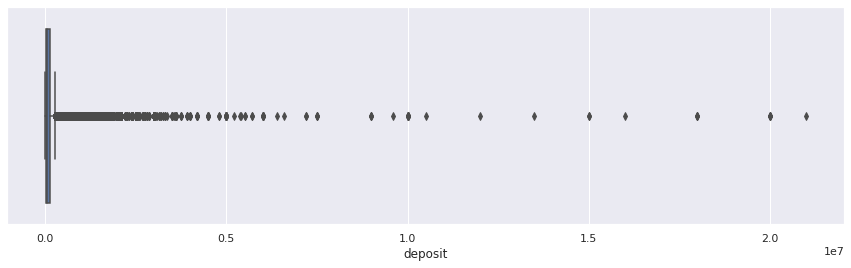

In [21]:
sns.boxplot(df['deposit'])

In [22]:
df['deposit'] = np.log(df['deposit']+1)

In [23]:
Q1 = df['deposit'].quantile(0.25)
Q3 = df['deposit'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
((df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['deposit'] < (Q1 - 1.5 * IQR)) | (df['deposit'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit'>

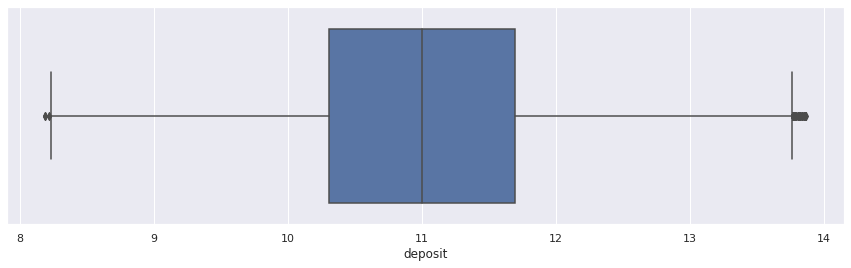

In [25]:
sns.boxplot(df['deposit'])

* We clearly observed in boxplot data is right skewed

In [26]:
df.isnull().sum()

city                        2263
monthly_rant                2263
BHKS                        2263
sqft_per_inch               2263
build_up_area               2263
Type_of_property            2263
location_of_the_property    2263
deposit                     2263
dtype: int64

In [27]:
df.dropna(inplace=True)

<AxesSubplot:>

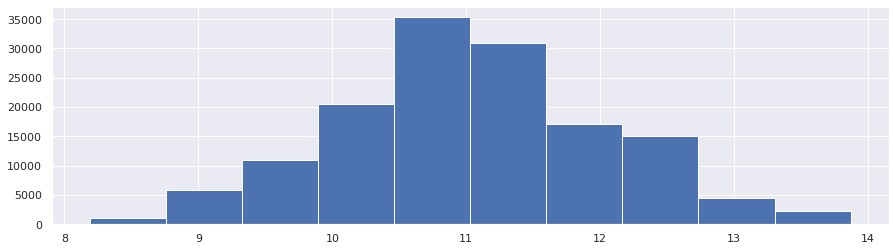

In [28]:
df['deposit'].hist()

In [29]:
#df['deposit']=df['deposit']**(1/2)
#df['deposit'].hist()

In [30]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470.0,Carpet Area,Residential,Kolshet Road,11.225257
1,mumbai,75000.0,3.0,1800.0,Super built-up Area,Residential,Sector 21 Nerul,12.899222


## sqft_per_inch

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

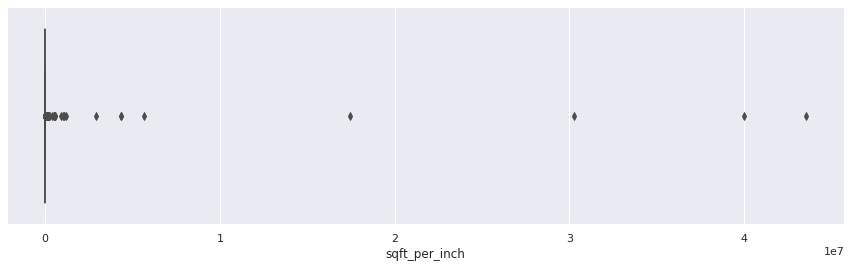

In [31]:
sns.boxplot(df.sqft_per_inch)

In [32]:
Q1 = df['sqft_per_inch'].quantile(0.25)
Q3 = df['sqft_per_inch'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
((df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))).mean()

mask = (df['sqft_per_inch'] < (Q1 - 1.5 * IQR)) | (df['sqft_per_inch'] > (Q3 + 1.5 * IQR))
df[mask] = np.nan

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_per_inch'>

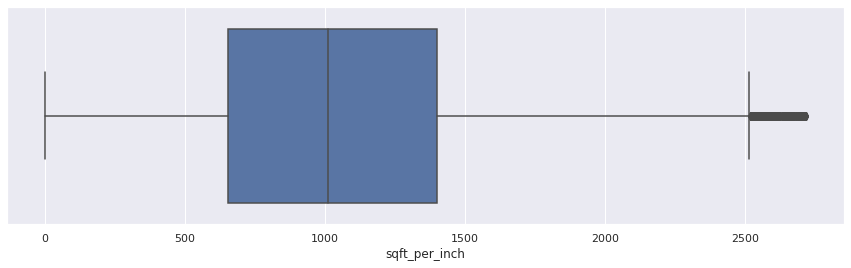

In [34]:
sns.boxplot(df.sqft_per_inch)

In [35]:
df.isnull().sum()

city                        6755
monthly_rant                6755
BHKS                        6755
sqft_per_inch               6755
build_up_area               6755
Type_of_property            6755
location_of_the_property    6755
deposit                     6755
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.head(2)

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,470.0,Carpet Area,Residential,Kolshet Road,11.225257
1,mumbai,75000.0,3.0,1800.0,Super built-up Area,Residential,Sector 21 Nerul,12.899222


In [38]:
df.drop('location_of_the_property',axis=1,inplace=True)

# --------------------------------------------------------------------------------------------------------

In [39]:
df.shape

(137016, 7)

In [40]:
df.skew()

monthly_rant     99.327773
BHKS              1.515366
sqft_per_inch     0.726170
deposit          -0.007746
dtype: float64

In [41]:
df['monthly_rant'] = np.log(df['monthly_rant']+1)

In [42]:
df.skew()

monthly_rant     0.602061
BHKS             1.515366
sqft_per_inch    0.726170
deposit         -0.007746
dtype: float64

In [43]:
df.BHKS.max(), df.BHKS.min()

(32.0, 1.0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137016 entries, 0 to 146527
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              137016 non-null  object 
 1   monthly_rant      137016 non-null  float64
 2   BHKS              137016 non-null  float64
 3   sqft_per_inch     137016 non-null  float64
 4   build_up_area     137016 non-null  object 
 5   Type_of_property  137016 non-null  object 
 6   deposit           137016 non-null  float64
dtypes: float64(4), object(3)
memory usage: 8.4+ MB


# Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

cty = LabelEncoder()
b_u_a = LabelEncoder()
T_o_p = LabelEncoder()
#l_o_t_p = LabelEncoder()


df['city'] = cty.fit_transform(df['city'])
df['build_up_area'] = b_u_a.fit_transform(df['build_up_area'])
df['Type_of_property'] = T_o_p.fit_transform(df['Type_of_property'])
#df['location_of_the_property'] = l_o_t_p.fit_transform(df['location_of_the_property'])


In [46]:
print("city",df['city'].unique())
print(cty.inverse_transform(list(df['city'].unique())))
print()
print("build_up_area:",df['build_up_area'].unique())
print(b_u_a.inverse_transform(list(df['build_up_area'].unique())))
print()
print("Type_of_property", df['Type_of_property'].unique())
print(T_o_p.inverse_transform(list(df['Type_of_property'].unique())))
print()
#print("location_of_the_property",df['location_of_the_property'].unique())
#print(l_o_t_p.inverse_transform(list(df['location_of_the_property'].unique())))


city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [47]:
df.head()

,city,monthly_rant,BHKS,sqft_per_inch,build_up_area,Type_of_property,deposit
0,5,9.770013,1.0,470.0,1,2,11.225257
1,5,11.225257,3.0,1800.0,3,2,12.899222
2,5,11.002117,2.0,950.0,3,2,12.206078
3,5,10.859018,3.0,1300.0,1,2,12.611541
4,5,10.308986,1.0,550.0,0,2,11.918397


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137016 entries, 0 to 146527
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   city              137016 non-null  int64  
 1   monthly_rant      137016 non-null  float64
 2   BHKS              137016 non-null  float64
 3   sqft_per_inch     137016 non-null  float64
 4   build_up_area     137016 non-null  int64  
 5   Type_of_property  137016 non-null  int64  
 6   deposit           137016 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 8.4 MB


## ----------------------------------------------------------Modeling------------------------------------------------------------

In [49]:
#Seperating the variable Independent matrix X and dependent Vector y

X = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [50]:
X.head(2)

,city,BHKS,sqft_per_inch,build_up_area,Type_of_property,deposit
0,5,1.0,470.0,1,2,11.225257
1,5,3.0,1800.0,3,2,12.899222


In [51]:
y.head(2)

0     9.770013
1    11.225257
Name: monthly_rant, dtype: float64

In [52]:
# Spliting the data into Training set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [53]:
X_train.shape

(109612, 6)

In [54]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
y_predict=forest.predict(X_test)
y_predict_train=forest.predict(X_train)

In [56]:
from sklearn.metrics import r2_score

print('Random Forest Train r2_score',r2_score(y_train,y_predict_train))
print('Random Forest Test r2_score',r2_score(y_test,y_predict))

Random Forest Train r2_score 0.9532234568562293
Random Forest Test r2_score 0.8776874081857914


In [57]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 200]},
                   random_state=42, verbose=2)

In [59]:
y_pred=rf_random.predict(X_test)
y_pred_train=rf_random.predict(X_train)

In [60]:
from sklearn.metrics import r2_score

print('Random Forest Train r2_score',r2_score(y_train,y_pred_train))
print('Random Forest Test r2_score',r2_score(y_test,y_pred))

Random Forest Train r2_score 0.9227176518132781
Random Forest Test r2_score 0.8885155378470582


In [62]:
rf_random.predict([[5,1.0,470.0,1,2,11.225257]])

array([9.82015511])

[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=  16.0s
[CV] n_estimators=200, min_samples_s

# -------------------------------------------------------------------------------------------------------------

## Save Model

In [63]:
import pickle

In [64]:
# Saving the model
pickle.dump(rf_random, open('rf_rand_model.pkl','wb'))

In [65]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 27.4 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.175
    Uninstalling ibm-watson-machine-learning-1.0.175:
      Successfully uninstalled ibm-watson-machine-learning-1.0.175


In [66]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [67]:
wml_credentials = {
    "apikey":"94Sb4mTPK3QgBVQl-QFNydq33hoivC3SUYR9H4Z_8bhX",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [68]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------------------  ------------------------
ID                                    NAME                            CREATED
1cf5bbd2-45fb-494e-912d-8cc9bce8de93  House_rant_deployment           2021-12-14T06:42:04.240Z
bd4db94f-947b-4203-86d5-3d044a6d25fb  Credit_card_approval_detection  2021-12-13T09:21:58.292Z
c69a7f8c-d160-4207-bcdf-17154d40766e  risk                            2021-11-26T05:13:31.073Z
0c4cbc44-cb18-42bd-ba83-fc3656d60b93  iceburg_deployment              2021-11-19T12:54:57.915Z
044db268-574f-4787-81ba-eaa7b243e439  F_s_deployment                  2021-11-17T07:03:36.948Z
e25a99a4-a8bd-40ad-90e5-0c40b5f79a5f  deployment_brain_t              2021-11-17T05:45:48.404Z
------------------------------------  ------------------------------  ------------------------


In [69]:
SPACE_ID="1cf5bbd2-45fb-494e-912d-8cc9bce8de93"

In [70]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [71]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [72]:
import sklearn
sklearn.__version__

'0.23.2'

In [73]:
MODEL_NAME = 'house_rent_pred'
DEPLOYMENT_NAME = 'House_rant_deployment'
House_rent_MODEL = rf_random

In [74]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [ ]:
#Save model
model_details = wml_client.repository.store_model(
    model=House_rent_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [ ]:
print(model_details)